# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data From YFinance

In [298]:
df_aapl = yf.download('AAPL', start='2018-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.426823,40.436212,39.722768,39.933986,102223600
2018-01-03,40.419777,40.964248,40.356415,40.490183,118071600
2018-01-04,40.607536,40.710798,40.384586,40.492539,89738400
2018-01-05,41.069862,41.156695,40.612227,40.703754,94640000
2018-01-08,40.917313,41.213014,40.818742,40.917313,82271200


## Generate Trading Signals

In [299]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703


In [300]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1


In [301]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
buy_markers, sell_markers

(Date
 2018-10-16    1.0
 2019-05-06    1.0
 2022-09-26    1.0
 2023-03-22    1.0
 2024-06-13    1.0
 Name: Signal, dtype: float64,
 Date
 2018-12-21   -1.0
 2022-06-03   -1.0
 2022-10-07   -1.0
 2024-03-14   -1.0
 2025-04-07   -1.0
 Name: Signal, dtype: float64)

In [302]:
df_aapl.index[0].timestamp()

1539648000.0

In [303]:
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1
...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961617,0
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0


In [304]:
buy_markers.index

DatetimeIndex(['2018-10-16', '2019-05-06', '2022-09-26', '2023-03-22',
               '2024-06-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [305]:
markers = markers[markers!=0]
markers

Date
2018-10-16    1.0
2018-12-21   -1.0
2019-05-06    1.0
2022-06-03   -1.0
2022-09-26    1.0
2022-10-07   -1.0
2023-03-22    1.0
2024-03-14   -1.0
2024-06-13    1.0
2025-04-07   -1.0
Name: Signal, dtype: float64

In [306]:
markers.index[3]

Timestamp('2022-06-03 00:00:00')

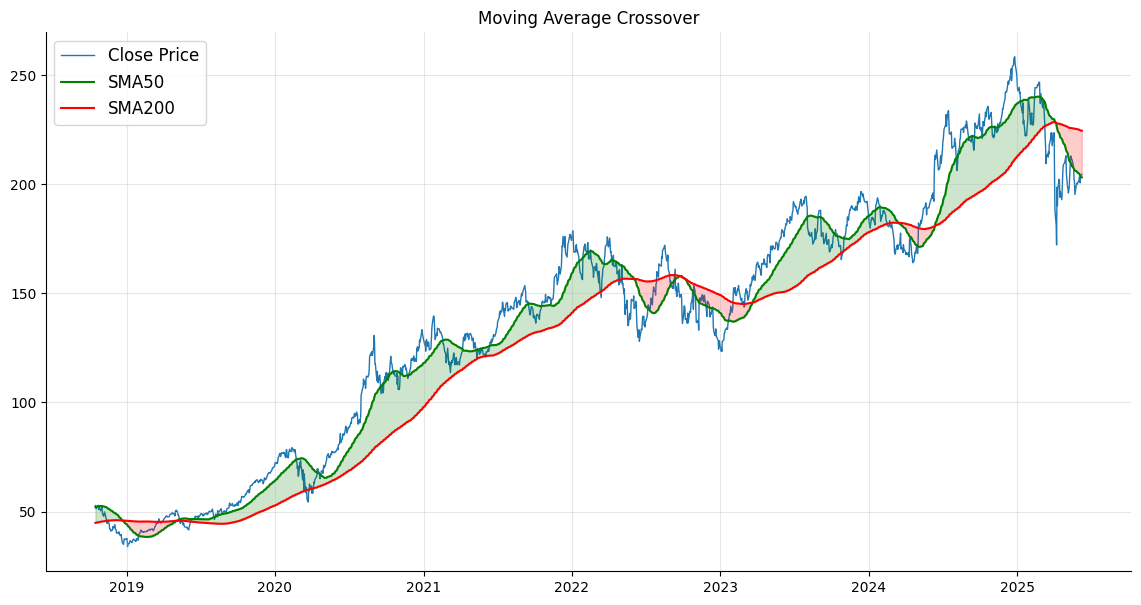

In [371]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
# ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
# ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

for i in range(len(markers)):

    if i != len(markers) - 1:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['SMA50'][markers.index[i]:markers.index[i+1]],
                            df_aapl['SMA200'][markers.index[i]:markers.index[i+1]],
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] > df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Green',
                            alpha=0.2)
        else:
                    ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['SMA50'][markers.index[i]:markers.index[i+1]],
                            df_aapl['SMA200'][markers.index[i]:markers.index[i+1]],
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] < df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Red',
                            alpha=0.2)
    else:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                            df_aapl['SMA50'][markers.index[i]:],
                            df_aapl['SMA200'][markers.index[i]:],
                            where=(df_aapl['SMA50'][markers.index[i]:] > df_aapl['SMA200'][markers.index[i]:]),
                            color='Green',
                            alpha=0.2)
        else:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                    df_aapl['SMA50'][markers.index[i]:],
                    df_aapl['SMA200'][markers.index[i]:],
                    where=(df_aapl['SMA50'][markers.index[i]:] < df_aapl['SMA200'][markers.index[i]:]),
                    color='Red',
                    alpha=0.2) 
          

ax.legend(loc='upper left', fontsize=12)

plt.show;

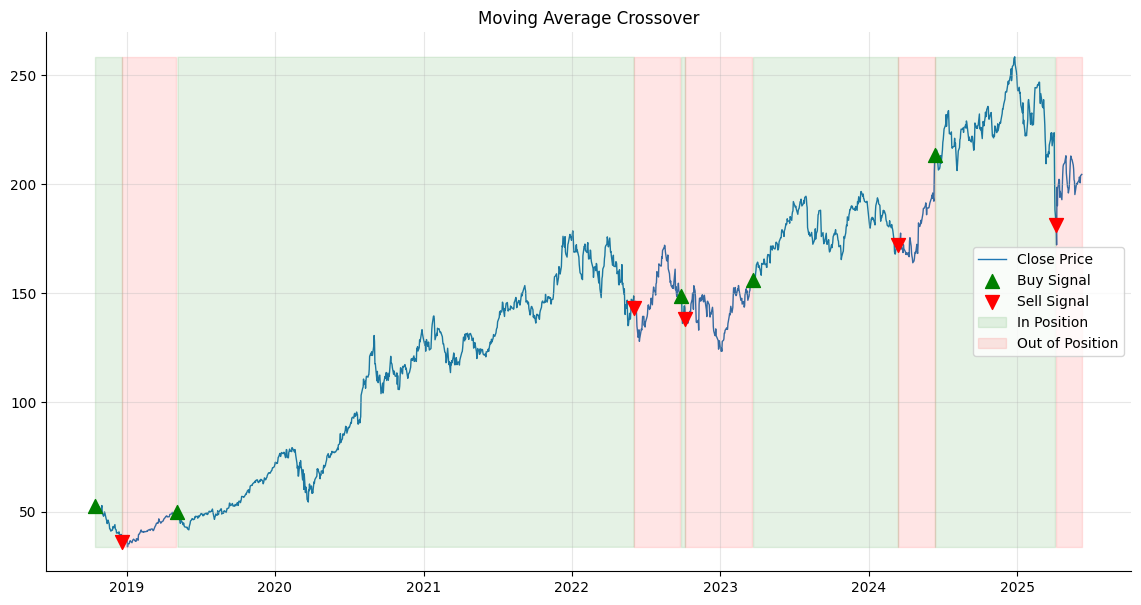

In [382]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
# ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=0.5, zorder=2)
# ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=0.5, zorder=3)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)



for i in range(len(markers)):

    if i != len(markers) - 1:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] > df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Green',
                            alpha=0.1,
                            label='In Position')
        else:
                    ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] < df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Red',
                            alpha=0.1,
                            label="Out of Position")
    else:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:] > df_aapl['SMA200'][markers.index[i]:]),
                            color='Green',
                            alpha=0.1)
        else:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:] < df_aapl['SMA200'][markers.index[i]:]),
                            color='Red',
                            alpha=0.1) 
          

ax.legend(loc='upper left', fontsize=12)
import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show;

## Calculate Returns

In [308]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Date,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1,1.0
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1,1.0
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1,1.0
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1,1.0
...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961617,0,0.0
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0


In [309]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret
Date,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1,1.0,-0.004321
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1,1.0,-0.023374
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1,1.0,0.015230
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1,1.0,0.006110
...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961617,0,0.0,0.007784
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798


In [310]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Date,,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1,NaN,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1,1.0,-0.004321,-0.004321
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1,1.0,-0.023374,-0.023374
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1,1.0,0.015230,0.015230
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1,1.0,0.006110,0.006110
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961617,0,0.0,0.007784,0.000000
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.000000
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000


In [314]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns
Date,,,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1,NaN,NaN,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1,1.0,-0.004321,-0.004321,0.995679
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1,1.0,-0.023374,-0.023374,0.972406
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1,1.0,0.015230,0.015230,0.987216
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1,1.0,0.006110,0.006110,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961617,0,0.0,0.007784,0.000000,3.854631
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.000000,3.846098
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000,3.804568


In [315]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2018-10-16,52.733974,52.933376,51.454496,51.969610,116736000,52.139061,44.800210,1,NaN,NaN,NaN,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209344,44.860606,1,1.0,-0.004321,-0.004321,0.995679,0.995679
2018-10-18,51.278831,52.161885,50.561943,51.715610,130325200,52.254419,44.914902,1,1.0,-0.023374,-0.023374,0.972406,0.972406
2018-10-19,52.059818,52.522709,51.613543,51.763093,132314800,52.307402,44.972163,1,1.0,0.015230,0.015230,0.987216,0.987216
2018-10-22,52.377907,53.021208,51.971989,52.173760,115168400,52.369691,45.028703,1,1.0,0.006110,0.006110,0.993248,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961617,0,0.0,0.007784,0.000000,3.854631,1.699718
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.000000,3.846098,1.699718
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000,3.804568,1.699718


## Analysis of Strategy Performance

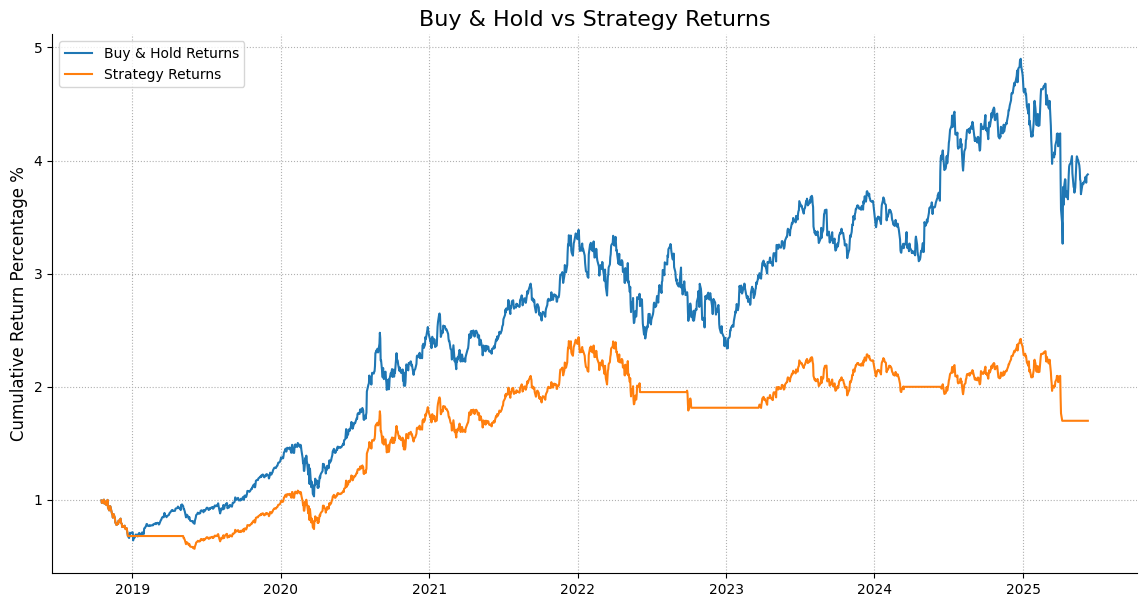

In [343]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)
ax.legend()

plt.show;